In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import PolynomialFeatures , StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [2]:
x = 6 * np.random.rand(200, 1) -3 

y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200 , 1)


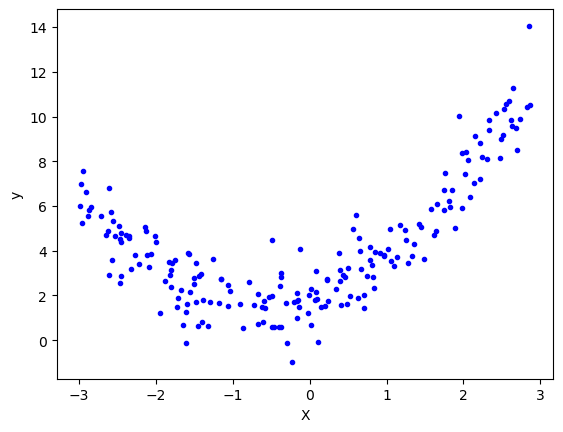

In [6]:
plt.plot(x,y,'b. ')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [10]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.2493388445830409

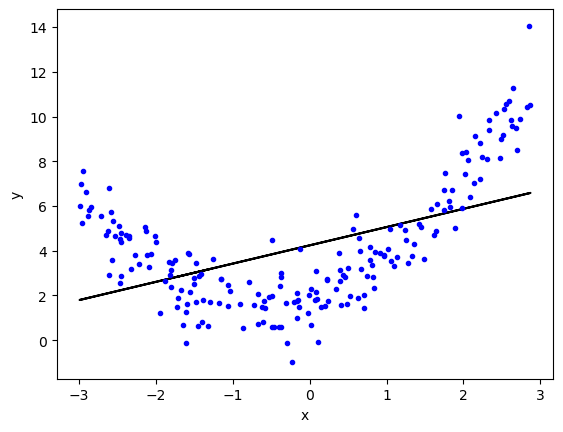

In [14]:
plt.plot(x_train,lr.predict(x_train),color ='black')
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [18]:
poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [19]:
print(x_train[0])
print(x_train_trans[0])

[-1.30288391]
[ 1.         -1.30288391  1.69750647]


In [20]:
lr = LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(x_test_trans)
r2_score(y_test,y_pred)

0.8970144745595564

In [22]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.99504492 0.8098275 ]]
[1.91393739]


In [23]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

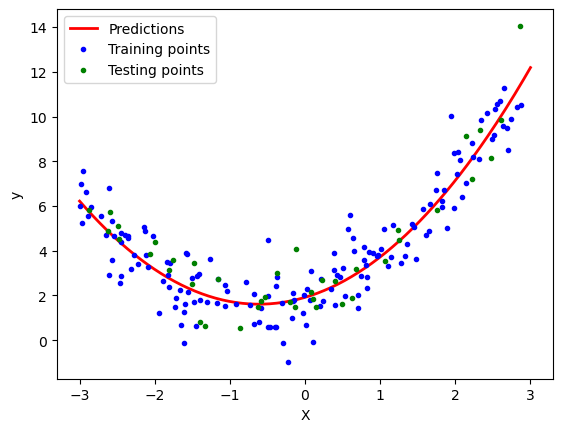

In [25]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [30]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1066: RuntimeWarning: overflow encountered in square
  temp **= 2
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


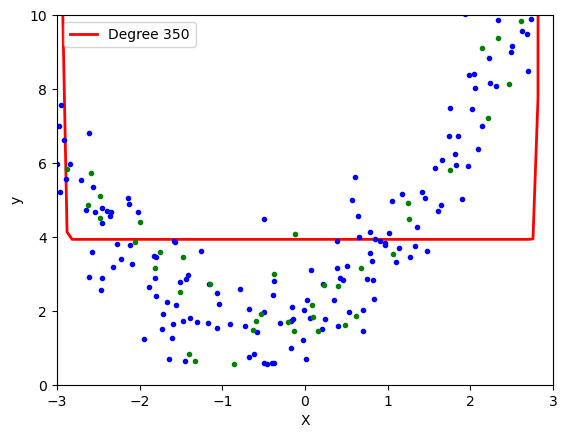

In [31]:
polynomial_regression(350)

In [34]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)